In [1]:
import sys, warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# load timeseries

In [2]:
from load_timeseries import load_timeseries

load_timeseries(subject=1, epic='rest')

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_pCunPCC_11,7Networks_RH_Default_pCunPCC_12,7Networks_RH_Default_pCunPCC_13,7Networks_RH_Default_pCunPCC_14,7Networks_RH_Default_pCunPCC_15,7Networks_RH_Default_pCunPCC_16,7Networks_RH_Default_pCunPCC_17,7Networks_RH_Default_pCunPCC_18,7Networks_RH_Cont_pCun_2,7Networks_RH_Cont_pCun_4
81,-1.147130,-0.011634,-0.834681,-0.981172,-1.318338,-0.709555,-0.171125,-0.250766,-0.217906,-0.344197,...,0.223958,0.232471,0.116335,-1.442267,0.817496,0.767920,-0.306158,0.638966,-0.426738,-0.397361
82,-1.320467,-0.231867,-0.563454,-1.171296,-0.817096,-0.323944,-0.904119,-0.269817,-0.090908,0.115817,...,-0.180995,-0.166467,-0.156110,-1.461224,0.465259,0.476541,-1.133818,0.368850,-1.214839,-0.509315
83,-1.174421,-0.428674,-0.363888,-0.905439,-0.494907,0.285463,-0.690789,-0.348310,0.206873,0.752206,...,0.192179,0.205476,-0.279778,-0.404232,0.050101,0.065233,-1.409807,0.031880,-1.246409,-0.476142
84,-0.756209,-0.760254,-0.420412,-0.667015,-0.666464,0.762095,0.164170,-0.601564,0.435701,1.124047,...,0.506466,0.538640,-0.609860,0.768665,-0.484686,-0.588126,-1.526292,-0.377665,-0.714696,-0.328736
85,-0.434393,-1.194737,-0.765582,-0.713403,-1.228695,0.819357,0.686869,-1.041278,0.278734,0.842465,...,0.129248,0.412432,-1.048262,1.386302,-0.927485,-1.306482,-1.644069,-0.645880,-0.149643,-0.187327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1.445563,1.121662,0.346299,0.184897,0.825249,0.372480,0.884837,0.344942,0.317202,1.401255,...,-0.192042,-0.877654,0.218058,1.913745,-0.300930,-0.729227,0.655901,0.581592,0.211765,0.690607
293,0.931139,1.339557,0.294348,0.275699,1.059023,1.462570,1.737677,0.704522,1.422811,1.281799,...,-0.011276,0.301594,0.108651,1.667814,-0.470783,-0.396696,0.353038,0.156804,0.365213,0.464623
294,0.146482,1.281695,0.341882,0.241623,0.899874,1.757626,1.471905,0.917270,2.029235,0.879437,...,0.224614,1.517956,-0.033524,0.921649,-0.453863,0.518422,0.302741,-0.234622,0.529878,0.214169
295,-0.096195,0.645910,0.398379,-0.180930,0.630592,0.834628,0.299376,0.876233,1.190080,0.603152,...,-0.093380,1.236797,-0.234652,0.025174,-0.389619,0.717657,0.247995,-0.637489,0.106300,-0.361705


# connectivity matrix

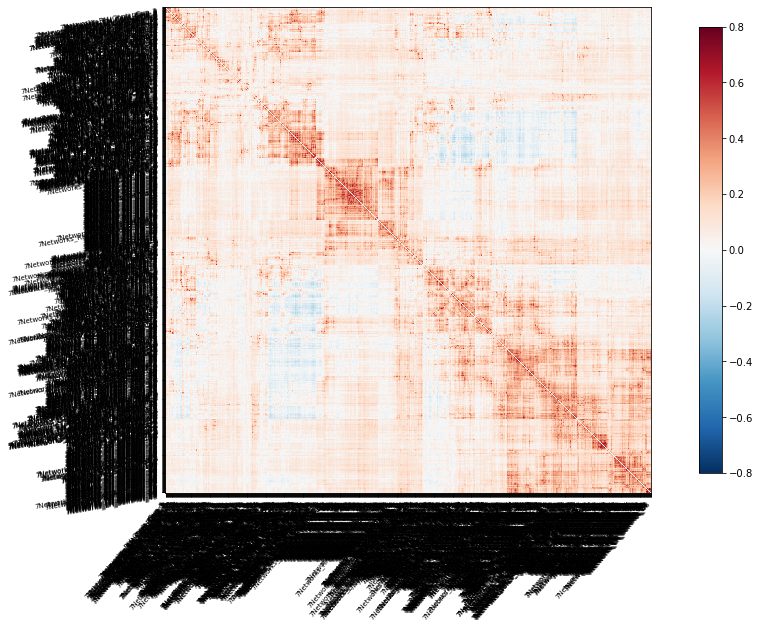

In [21]:
from connectivity_matrix import plot_conn_mat

plot_conn_mat(epic='late', significant_regions=False)

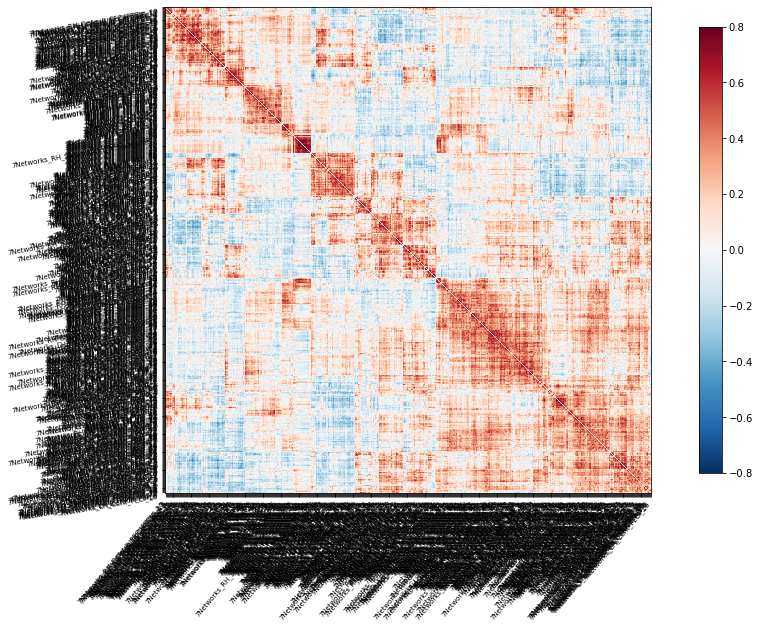

In [22]:
from connectivity_matrix import plot_conn_mat

plot_conn_mat(epic='late', subject=3)

# plot brain

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


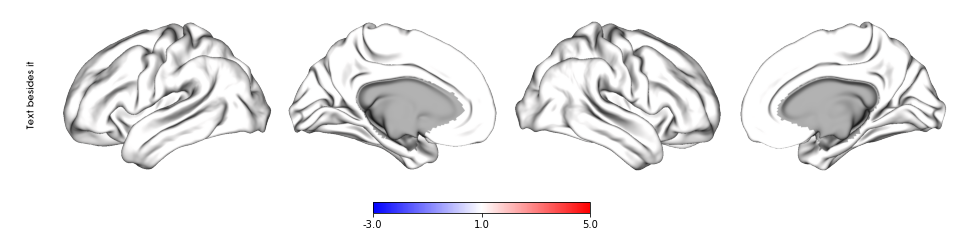

In [5]:
from plot_brain import plot_brain

plot_brain([1] * 998, color_map='bwr',
           color_range=(-3, 5), text='Text besides it')

# gradients and eccentricity

In [6]:
from measures import get_measures

df = get_measures()

Reading data from data/measures.csv


In [7]:
from measures import get_measures

get_measures(measures=['gradient1'], subjects=[2, 3])

Reading data from data/measures.csv


,region,value,subject,epic,measure
11976,0,0.505765,2,baseline,gradient1
11977,1,0.732428,2,baseline,gradient1
11978,2,0.671570,2,baseline,gradient1
11979,3,0.286556,2,baseline,gradient1
11980,4,-1.240469,2,baseline,gradient1
...,...,...,...,...,...
32929,993,-1.517472,3,late,gradient1
32930,994,-0.960989,3,late,gradient1
32931,995,-1.437627,3,late,gradient1
32932,996,-1.339074,3,late,gradient1


Reading data from data/measures.csv


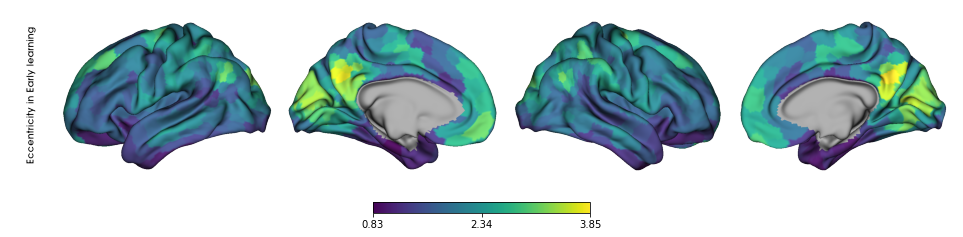

In [8]:
from measures import get_measures_avg

v = get_measures_avg(epic_list=['baseline'],
             measures=['eccentricity'])

plot_brain(v.value, color_map='viridis', text='Eccentricity in Early learning')

Reading data from data/measures.csv


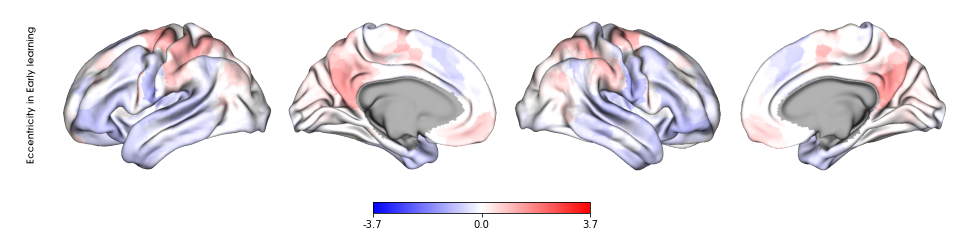

In [9]:
v = get_measures_avg(epic_list=['baseline'],
             measures=['gradient4'])

plot_brain(v.value, color_map='bwr', color_range=(-3.7, 3.7), text='Eccentricity in Early learning')

In [10]:
# todo table of grads epics

## variance

In [4]:
from gradient import variance_explained

variance = variance_explained(epic_list=None, reference_epic='baseline')

Computing variance explained...


100%|██████████| 45/45 [00:18<00:00,  2.37it/s]


<AxesSubplot:xlabel='variable', ylabel='value'>

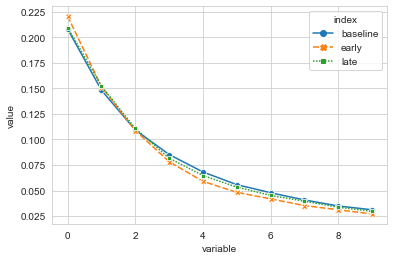

In [6]:
import seaborn as sns
import pandas as pd

sns.lineplot(y='value', x='variable', hue='index',
             style='index', markers=True,
    data=pd.melt(variance.reset_index(),['index']))

# statistics

## repeated measures ANOVA

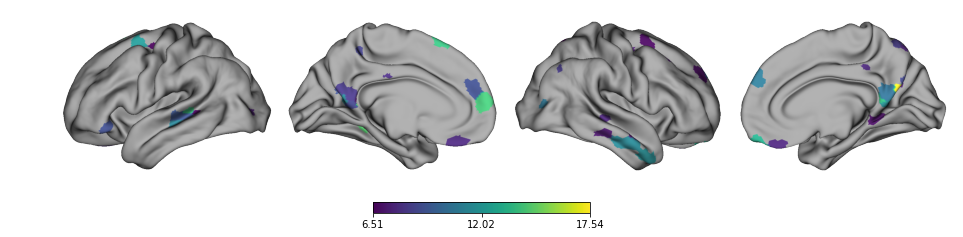

In [11]:
from stats import rm_anova
from plot_brain import plot_brain_masked

df_stats = rm_anova(df)
df_stats_ecc = df_stats[df_stats.measure == 'eccentricity']
plot_brain_masked(df_stats_ecc.F, df_stats_ecc.pvalue_corrected)

In [ ]:
# think of multilevel anova. each region has four values.

In [12]:
# loosen the FDR criteria

In [13]:
df_stats_ecc.fdr_significant.sum()

51

## pairwise t-tests

In [14]:
from stats import pairwise_ttests

df_stats_pairwise = pairwise_ttests(df)
df_stats_pairwise

region     tstat  pvalue_corrected
measure      A        B                                        
eccentricity baseline early       0  0.248190          0.804565
                      late        0  0.651545          0.804565
             early    late        0  0.480602          0.804565
             baseline early       1 -0.541432          0.884367
                      late        1 -0.649664          0.884367
...                             ...       ...               ...
gradient4    baseline late      996  2.204019          0.045199
             early    late      996  0.131166          0.895943
             baseline early     997  1.210103          0.344220
                      late      997  1.333193          0.344220
             early    late      997  0.119005          0.905543

[14970 rows x 3 columns]

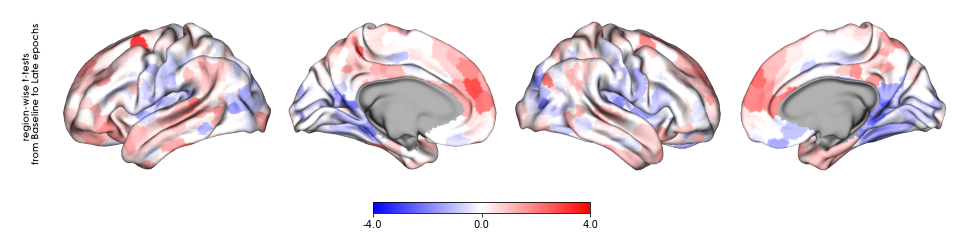

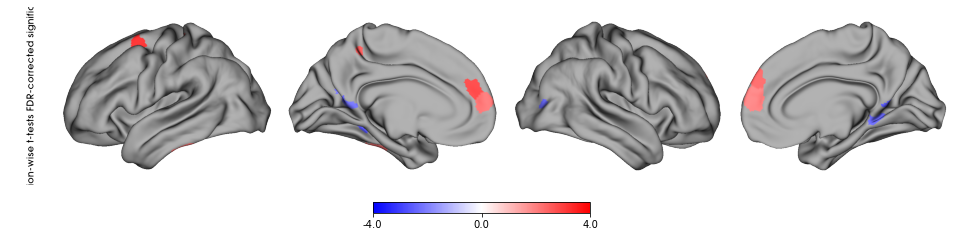

In [15]:
df_contrast = df_stats_pairwise.loc['eccentricity', 'early', 'late']

plot_brain(df_contrast['tstat'],
           text='region-wise t-tests \n from Baseline to Late epochs', color_range=(-4, 4), color_map='bwr')
plot_brain_masked(df_contrast['tstat'], df_contrast['pvalue_corrected'],
                  text='region-wise t-tests FDR-corrected significant', color_range=(-4, 4), color_map='bwr')

# seed connectivity
post hoc analysis

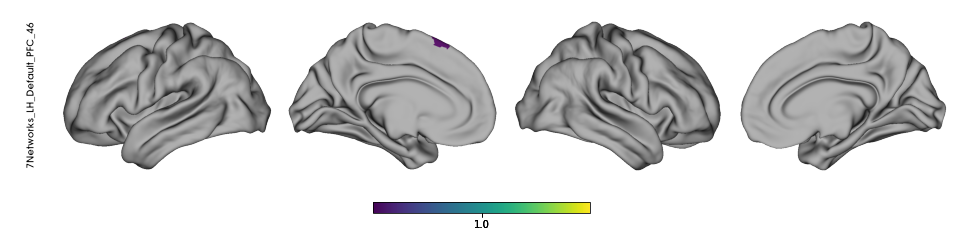

In [16]:
from load_timeseries import spot_region, get_regions_names

sample_region = 460
plot_brain(spot_region(sample_region),
           text=get_regions_names(sample_region)[0])

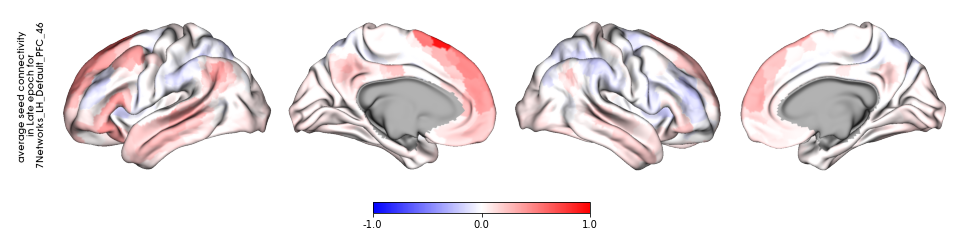

In [17]:
from seed_conn import seed_connectivity, seed_average

df_seed = seed_connectivity(sample_region)
df_seed_avg = seed_average(df_seed)

text = 'average seed connectivity \n in Late epoch for \n' + get_regions_names(sample_region)[0]
plot_brain(df_seed_avg.loc[sample_region, 'late'],
           color_range=(-1, 1), color_map='bwr',
           text=text)

## pairwise t-tests seed

In [18]:
from stats import seed_ttests

df_seed_shift = seed_ttests(df_seed)
df_seed_shift

Computing ttests...


100%|██████████| 998/998 [00:10<00:00, 94.07it/s]


region     tstat  pvalue_corrected
A        B                                        
baseline early       0 -0.697830          0.775817
         late        0 -0.393725          0.775817
early    late        0  0.285651          0.775817
baseline early       1  1.005155          0.476367
         late        1  1.010564          0.476367
...                ...       ...               ...
         late      996 -0.445563          0.657007
early    late      996  2.010145          0.071217
baseline early     997 -2.046447          0.084500
         late      997 -1.933946          0.084500
early    late      997  0.218186          0.827790

[2994 rows x 3 columns]

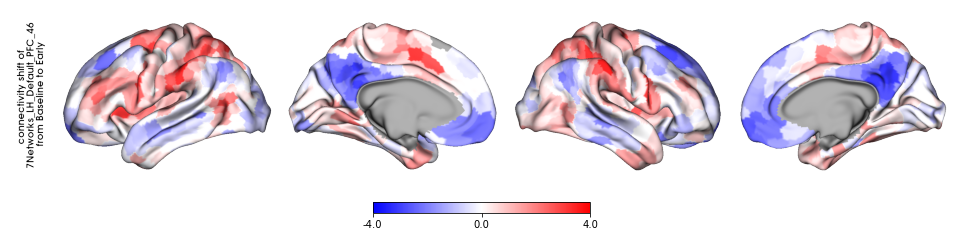

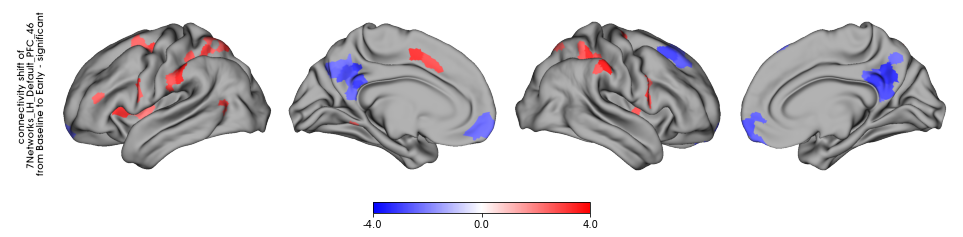

In [20]:
df_seed_shift_ = df_seed_shift.loc['baseline', 'early']

text = 'connectivity shift of \n' + get_regions_names(sample_region)[0] + '\n from Baseline to Early'
plot_brain(df_seed_shift_.tstat, color_range=(-4, 4), color_map='bwr', text=text)
plot_brain_masked(df_seed_shift_.tstat, df_seed_shift_.pvalue_corrected,
                  color_range=(-4, 4), color_map='bwr', text=text + ' - significant')